In [81]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import os

# DC Data Loading

In [82]:
dc = pd.read_csv('/kaggle/input/fivethirtyeight-comic-characters-dataset/dc-wikia-data.csv')
dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


# DC Data Info

In [83]:
dc.describe()

,page_id,APPEARANCES,YEAR
count,6896.000000,6541.000000,6827.000000
mean,147441.209252,23.625134,1989.766662
std,108388.631149,87.378509,16.824194
min,1380.000000,1.000000,1935.000000
25%,44105.500000,2.000000,1983.000000
50%,141267.000000,6.000000,1992.000000
75%,213203.000000,15.000000,2003.000000
max,404010.000000,3093.000000,2013.000000


In [84]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   GSM               64 non-null     object 
 9   ALIVE             6893 non-null   object 
 10  APPEARANCES       6541 non-null   float64
 11  FIRST APPEARANCE  6827 non-null   object 
 12  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


In [85]:
dc.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [86]:
dc.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR'],
      dtype='object')

# Marvel Data Loading

In [87]:
marvel = pd.read_csv('/kaggle/input/fivethirtyeight-comic-characters-dataset/marvel-wikia-data.csv')
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


# Marvel Data Info

In [88]:
marvel.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


In [89]:
marvel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [90]:
marvel.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')

In [91]:
marvel.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

# Exploratory Data Analysis Marvel vs DC

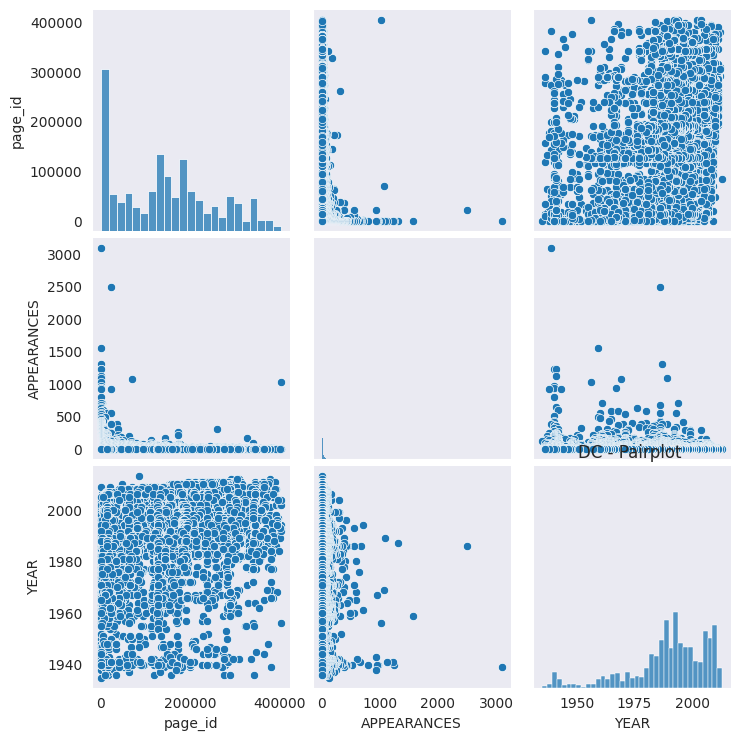

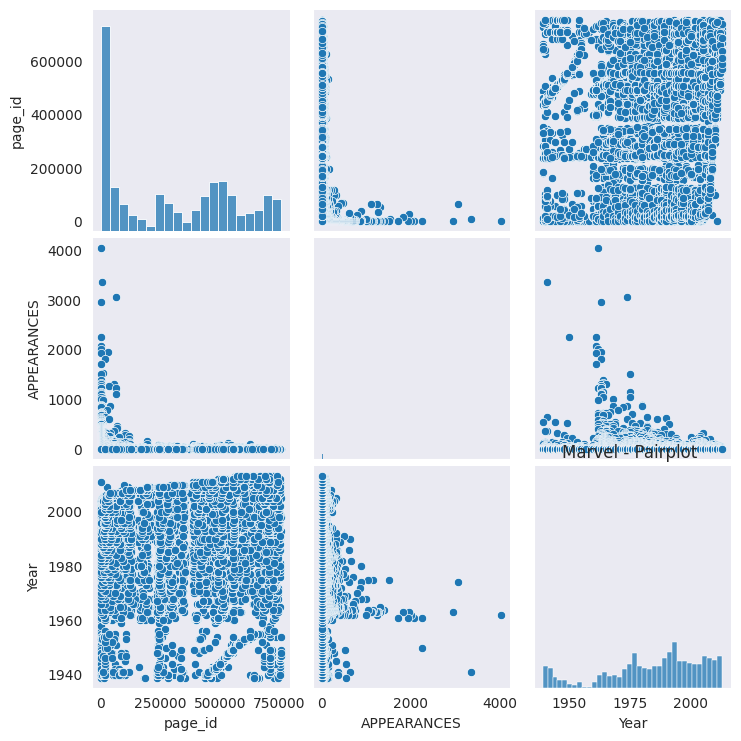

In [92]:
sns.pairplot(data=dc)
plt.title('DC - Pairplot ')
plt.show()

sns.pairplot(data=marvel)
plt.title('Marvel - Pairplot ')
plt.show()

# SEX Marvel vs DC

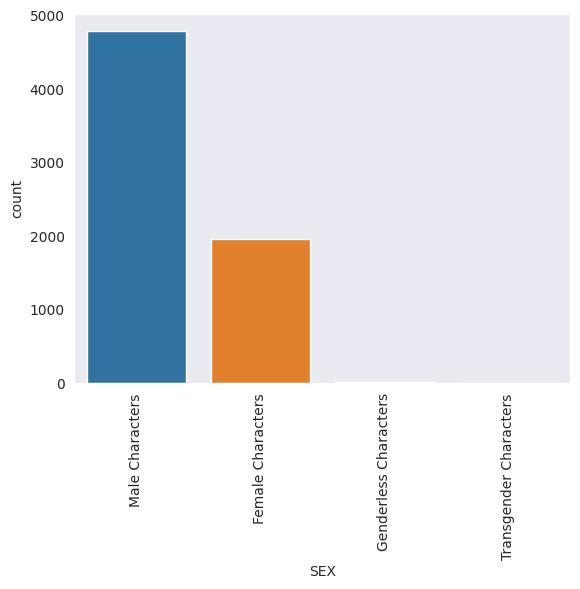

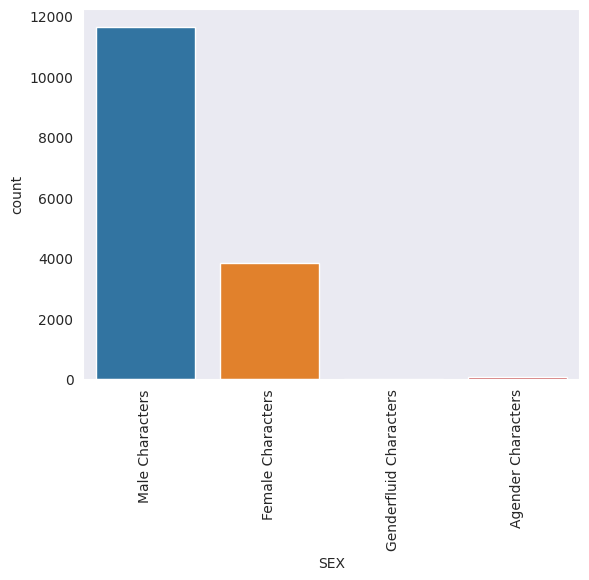

In [93]:
sns.countplot(data=dc,x='SEX')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=marvel,x='SEX')
plt.xticks(rotation=90)
plt.show()

# ALIVE Marvel vs DC

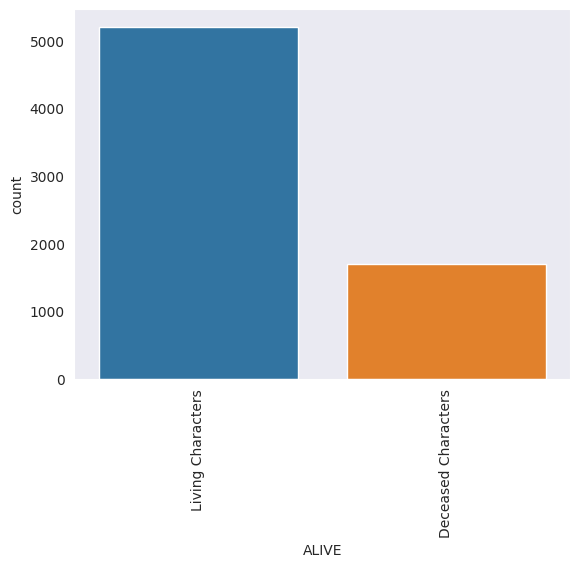

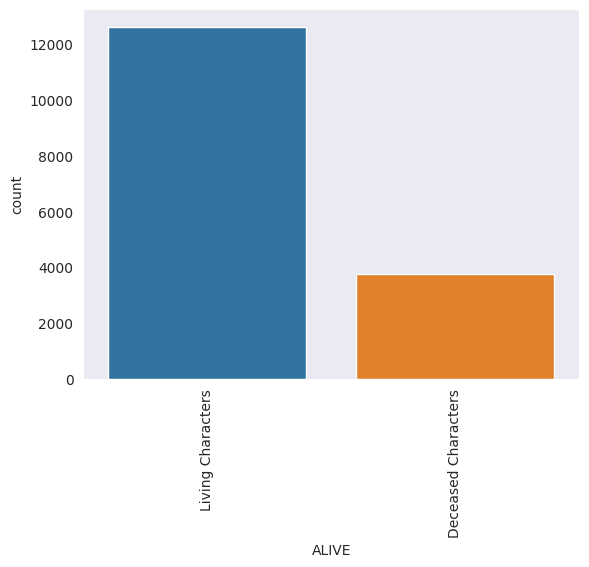

In [94]:
sns.countplot(data=dc,x='ALIVE')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=marvel,x='ALIVE')
plt.xticks(rotation=90)
plt.show()

In [95]:
alive_count = dc['ALIVE'].value_counts().reset_index()
alive_count.columns = ['ALIVE', 'Count']

fig_alive = px.pie(alive_count, values='Count', names='ALIVE', title='Character Alive Status')
fig_alive.show()


alive_count = marvel['ALIVE'].value_counts().reset_index()
alive_count.columns = ['ALIVE', 'Count']

fig_alive = px.pie(alive_count, values='Count', names='ALIVE', title='Character Alive Status')
fig_alive.show()

# ID Marvel vs DC

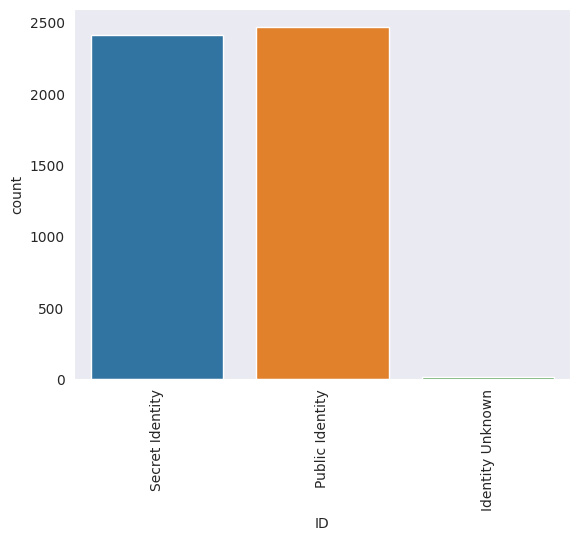

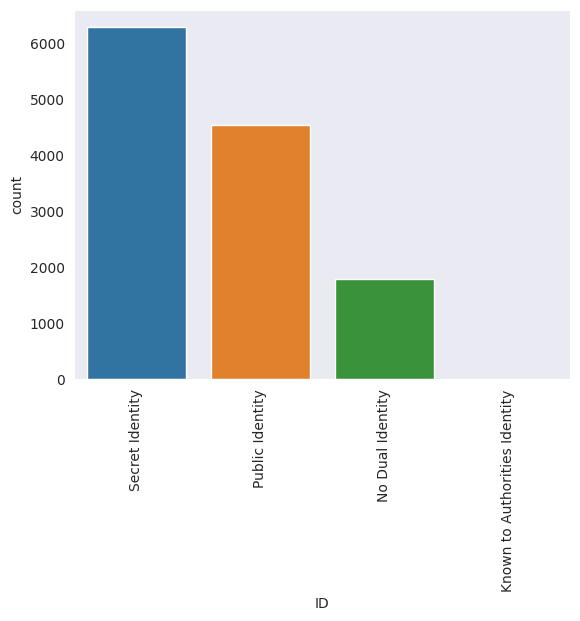

In [96]:
sns.countplot(data=dc,x='ID')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=marvel,x='ID')
plt.xticks(rotation=90)
plt.show()

# Appearances' vs. 'First_appeared

In [97]:
fig_scatter = px.scatter(dc, x='APPEARANCES', y='FIRST APPEARANCE', title='Character Appearances vs. First Appearance')
fig_scatter.show()

fig_scatter = px.scatter(marvel, x='APPEARANCES', y='FIRST APPEARANCE', title='Character Appearances vs. First Appearance')
fig_scatter.show()

# Appearances' by 'Sex

In [98]:
fig_box_sex = px.box(dc, x='SEX', y='APPEARANCES', title='Character Appearances by Sex OF DC')
fig_box_sex.show()

# Histogram 
fig_hist_sex = px.histogram(dc, x='APPEARANCES', color='SEX', title='Character Appearances Histogram by Sex OF DC')
fig_hist_sex.show()


fig_box_sex = px.box(marvel, x='SEX', y='APPEARANCES', title='Character Appearances by Sex OF Marvel')
fig_box_sex.show()

# Histogram 
fig_hist_sex = px.histogram(marvel, x='APPEARANCES', color='SEX', title='Character Appearances Histogram by Sex OF Marvel')
fig_hist_sex.show()